In [4]:
#스파크 객체 생성
from pyspark import SparkConf , SparkContext

conf = SparkConf().setMaster("local").setAppName("Book")
spark = SparkContext(conf=conf).getOrCreate()

import os 

#데이터 로드
directory = os.path.join(os.getcwd(),"data")
filename = "Book"
filepath = os.path.join(directory, filename)

#Spark RDD 생성
lines = spark.textFile("file:///"+filepath.replace("ww", "/"))
lines 

file:////home/lab09/src/data/Book MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [10]:
lines.take(5)

['Self-Employment: Building an Internet Business of One',
 'Achieving Financial and Personal Freedom through a Lifestyle Technology Business',
 'By Frank Kane',
 '',
 '']

In [15]:
map_words= lines.map(lambda x : x.split())
map_words.take(5)

[['Self-Employment:', 'Building', 'an', 'Internet', 'Business', 'of', 'One'],
 ['Achieving',
  'Financial',
  'and',
  'Personal',
  'Freedom',
  'through',
  'a',
  'Lifestyle',
  'Technology',
  'Business'],
 ['By', 'Frank', 'Kane'],
 [],
 []]

In [25]:
words = lines.flatMap(lambda x : x.split())
words.take(10)

['Self-Employment:',
 'Building',
 'an',
 'Internet',
 'Business',
 'of',
 'One',
 'Achieving',
 'Financial',
 'and']

In [19]:
wordCounts = words.countByValue()
wordCounts

defaultdict(int,
            {'Self-Employment:': 1,
             'Building': 5,
             'an': 172,
             'Internet': 13,
             'Business': 19,
             'of': 941,
             'One': 12,
             'Achieving': 1,
             'Financial': 3,
             'and': 901,
             'Personal': 3,
             'Freedom': 7,
             'through': 55,
             'a': 1148,
             'Lifestyle': 5,
             'Technology': 2,
             'By': 9,
             'Frank': 10,
             'Kane': 7,
             'Copyright': 1,
             '�': 174,
             '2015': 3,
             'Kane.': 1,
             'All': 13,
             'rights': 3,
             'reserved': 2,
             'worldwide.': 2,
             'CONTENTS': 1,
             'Disclaimer': 1,
             'Preface': 1,
             'Part': 2,
             'I:': 2,
             'Making': 5,
             'the': 1176,
             'Big': 1,
             'Decision': 1,
             'Overcoming'

In [26]:
#pip install wordcloud
from wordcloud import WordCloud

In [24]:
wordCounts.items()

dict_items([('Self-Employment:', 1), ('Building', 5), ('an', 172), ('Internet', 13), ('Business', 19), ('of', 941), ('One', 12), ('Achieving', 1), ('Financial', 3), ('and', 901), ('Personal', 3), ('Freedom', 7), ('through', 55), ('a', 1148), ('Lifestyle', 5), ('Technology', 2), ('By', 9), ('Frank', 10), ('Kane', 7), ('Copyright', 1), ('�', 174), ('2015', 3), ('Kane.', 1), ('All', 13), ('rights', 3), ('reserved', 2), ('worldwide.', 2), ('CONTENTS', 1), ('Disclaimer', 1), ('Preface', 1), ('Part', 2), ('I:', 2), ('Making', 5), ('the', 1176), ('Big', 1), ('Decision', 1), ('Overcoming', 1), ('Inertia', 1), ('Fear', 1), ('Failure', 1), ('Career', 1), ('Indoctrination', 2), ('The', 88), ('Carrot', 1), ('on', 399), ('Stick', 2), ('Ego', 1), ('Protection', 1), ('Your', 62), ('Employer', 2), ('as', 297), ('Security', 2), ('Blanket', 1), ('Why', 3), ('it�s', 28), ('Worth', 1), ('it', 311), ('Unlimited', 2), ('Growth', 4), ('Potential', 1), ('Investing', 3), ('in', 552), ('Yourself,', 1), ('Not', 

In [31]:
stop_words = {'a' , 'an'}

In [33]:
filtered_word_counts = { k:v for k,v in wordCounts.items() if k.lower() not in stop_words and len(k)>2 }

In [37]:
top_words = sorted(filtered_word_counts.items(), key = lambda x : x[1], reverse = True)[:20]
word_list = [word for word, count in top_words]
word_counts_list = [count for word, count in top_words]

<BarContainer object of 20 artists>

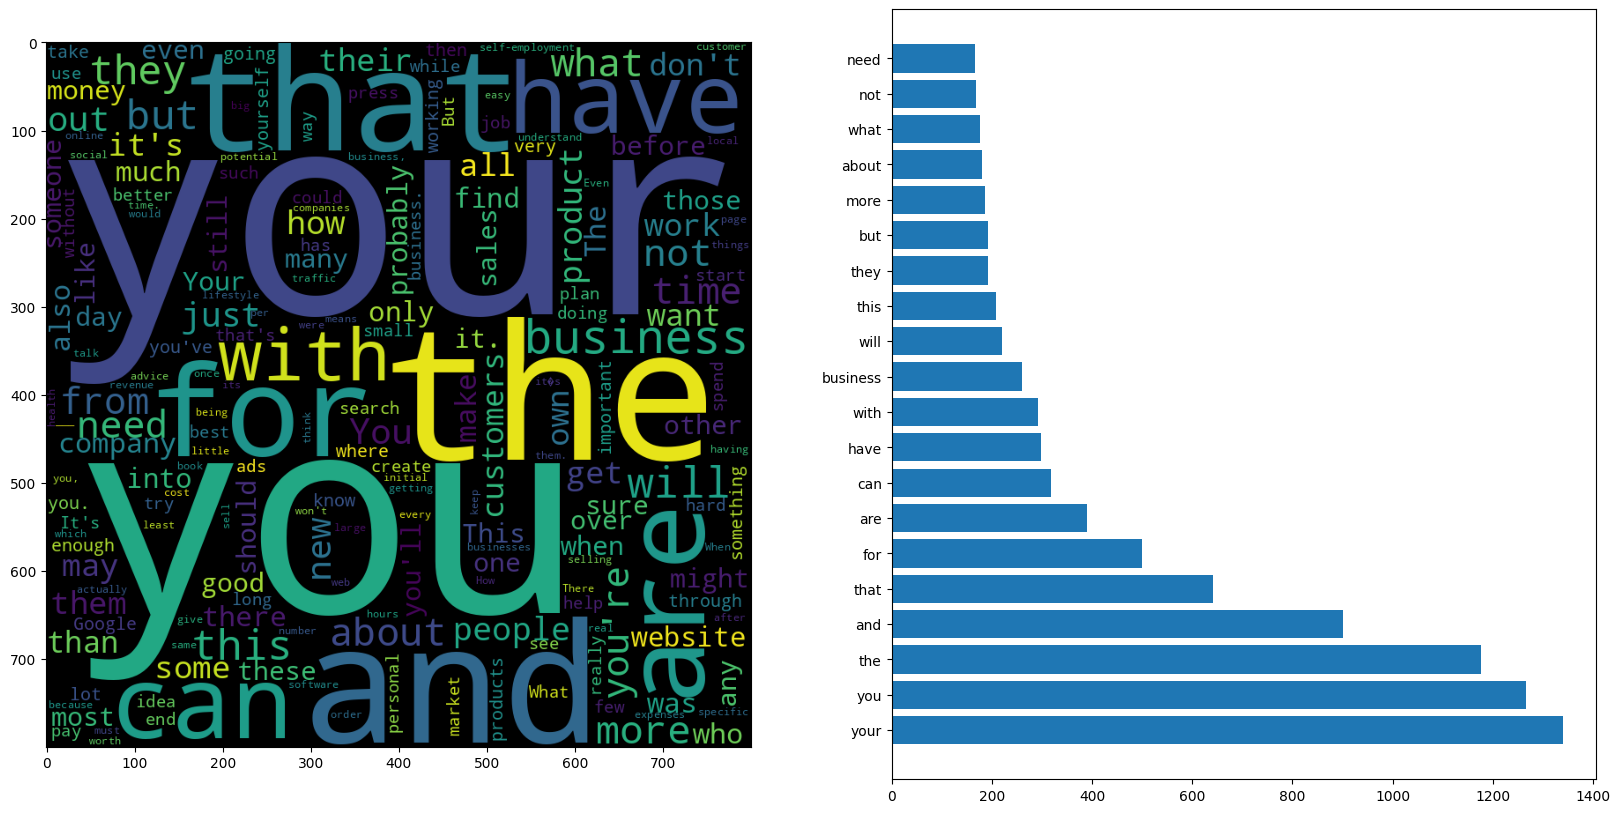

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
wc = WordCloud(width = 800, height = 800).generate_from_frequencies(filtered_word_counts)
plt.imshow(wc)

plt.subplot(1,2,2)
plt.barh(word_list, word_counts_list)


In [43]:
spark.stop()